<u>Objet : Gestion simplifiée des notes d'élèves (R. Hatterer)</u>

Pour mettre [mocodo](https://rawgit.com/laowantong/mocodo/master/doc/fr_refman.html) à disposition de ce notebook, évaluez la cellule suivante:

In [1]:
%reload_ext mocodo_magic

# Établissement progressif du Modèle Conceptuel des Données 

## Les entités
Je propose de commencer le MCD par l'entité EVALUATION, car avant de reporter les notes de ses élèves dans une application de gestion des notes un professeur commence par donner un nom à l'évaluation, une date (celle où a eu lieu le contrôle), le logiciel peut aussi proposer de saisir la date à partir de laquelle les notes de l'évaluation seront visibles aux élèves.   

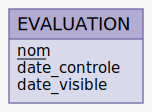

In [2]:
%%mocodo  --colors brewer+4 --shapes copperplate  --strengthen_card (1,1) 

EVALUATION: nom, date_controle, date_visible

Cependant, ni le nom ni les dates évoquées ne sont pertinents pour identifier l'évaluation. En effet, d'autres professeurs peuvent avoir choisi le même nom, ou le professeur souhaite donner ce nom à une évaluation donnée à une autre classe...
On devra utiliser un identifiant unique par exemple (`evaluation_id`) qui sera incrémenté à chaque nouvelle saisie.  
De plus, une fois que des évaluations auront été saisies, il faut que les informations qui ont été enregistrées permettent également d'identifier:  
 - le professeur qui a réalisé l'évaluation   
 - la discipline sur laquelle le contrôle portait  
 - la classe à qui était destiné le contrôle  
 - quand il doit être pris en compte (année scolaire, trimestre, semestre...)  

En toute logique (allusion subtile au MLD), les informations devant être portées par l'entité EVALUATION sont donc:

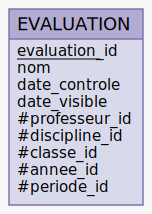

In [3]:
%%mocodo --colors brewer+4 --shapes copperplate  --strengthen_card (1,1) 

EVALUATION: evaluation_id, nom, date_controle, date_visible,  #professeur_id, #discipline_id, #classe_id, #annee_id, #periode_id


L'analyse précédente a révélé l'existence de nouvelles entités. Chacune portant un certain nombre d'[attributs](https://ineumann.developpez.com/tutoriels/merise/initiation-merise/#LII-D-1).  

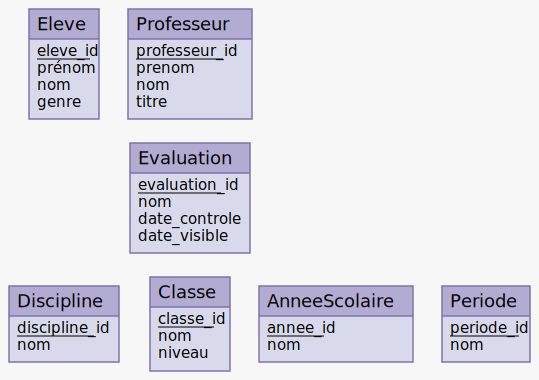

In [4]:
%%mocodo --colors brewer+4 --shapes copperplate --relations diagram markdown_data_dict--strengthen_card (1,1) 

Eleve: eleve_id, prénom, nom, genre
Professeur: professeur_id, prenom, nom, titre
:

Evaluation: evaluation_id, nom, date_controle, date_visible

Discipline: discipline_id, nom
Classe: classe_id, nom, niveau
AnneeScolaire: annee_id, nom
Periode: periode_id, nom

## Les associations

Tâchons d'établir comment l'entité EVALUATION peut interagir avec les autres entités.  

*Établir des associations entre l'entité EVALUATION et les autres entités doit permettre de retrouver les attributs qui en toute logique doivent aussi être portés par elle.*

### Association ... REALISER par ...

Avant de pouvoir noter ses élèves un PROFESSEUR doit REALISER des EVALUATIONs.  
Nous distinguons donc deux **entités** (PROFESSEUR et REALISER) et une **association** (REALISER).  
L'**association** REALISER possède les cardinalités suivantes :  
 - Une évaluation est réalisée par **1 et 1 seul** professeur  
 - UN professeur réalise **0 ou plusieurs** évaluations  

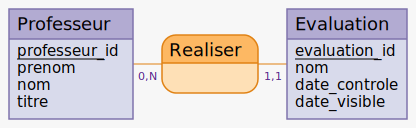

In [5]:
%%mocodo  --colors brewer+4 --shapes copperplate  --strengthen_card (1,1) 

Professeur: professeur_id, prenom, nom, titre
Realiser, 11 Evaluation,  0N Professeur
Evaluation: evaluation_id, nom, date_controle, date_visible


### Association ... PORTER sur ...

Une EVALUATION va PORTER  sur une DISCIPLINE.  
Cardinalités:  
 - Une évaluation va porter sur **une et une seule** discipline.  
 - Une discipline peut donner lieu à **0 ou plusieurs** évaluations.  

### Association ... DESTINER à ...

Une EVALUTION est DESTINEE à une CLASSE.  
Cardinalités:  
 - Une évaluation est destinée à **une et une seule** classe (rien n'empêche de donner le même sujet une seconde fois, mais le référencement de la seconde évaluation sera différent de la première).  
 - Une classe peut subir **0 ou plusieurs** évaluations.  

### Association SITUER dans le temps

Une EVALUATION est à SITUER dans une période scolaire précise (année-scolaire, trimestre ou semestre, examen blanc...)  
Cadinalités:  
 - Une évaluation est à situer dans **une et une seule** année-scolaire et dans **une et une seule** période (trimestre ou semestre, examen blanc...)  
 - Une année-scolaire peut donner lieu à **0 ou plusieurs** évaluations.   
 - Il est est de même pour une période.  
 
 Une association peut, comme ici, impliquer plus de deux entités.

### Situation intermédiaire

Le MCD et le MLD correspondant aux **entités** et **associations** précédentes sont donnés par mocodo grâce au code suivant:

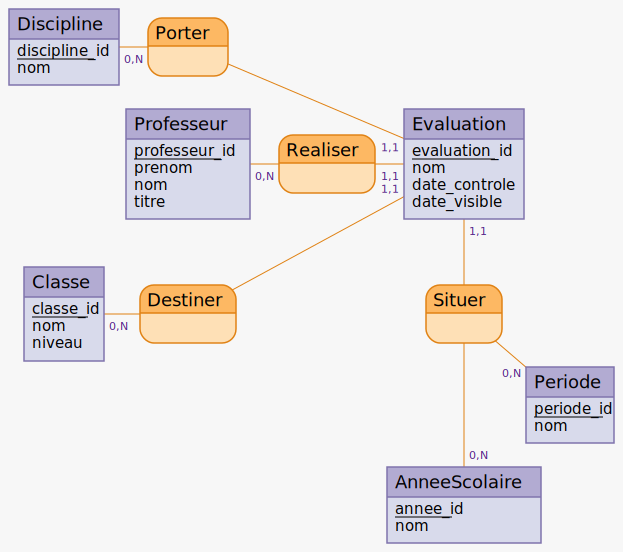

In [6]:
%%mocodo --mld --colors brewer+4 --shapes copperplate --relations diagram markdown_data_dict--strengthen_card (1,1) 

Discipline: discipline_id, nom
Porter, 11 Evaluation, 0N Discipline
::

:
Professeur: professeur_id, prenom, nom, titre
Realiser, 11 Evaluation,  0N Professeur
Evaluation: evaluation_id, nom, date_controle, date_visible

:
    
Classe: classe_id, nom, niveau
Destiner, 11 Evaluation, 0N Classe
:
Situer, 0N AnneeScolaire, 0N Periode, 11 Evaluation

:
:
:
:
Periode: periode_id, nom

:::
AnneeScolaire: annee_id, nom
:

Le MLD ([modèle logique de données](https://ineumann.developpez.com/tutoriels/merise/initiation-merise/#LIII-A-1)) ci-dessus, fait apparaitre six **relations**. 

Une **relation** possède un nom qui correspond en général à celui de l'**entité** ou de l'**association** qui lui correspond. Elle possède aussi une clef primaire qui permet d'identifier sans ambiguïté chaque occurrence de cette relation. La clef primaire peut être composée d'un ou plusieurs attributs, il s'agit d'une implantation de la notion d'identifiant des entités et associations qui se répercute au niveau relationnel.

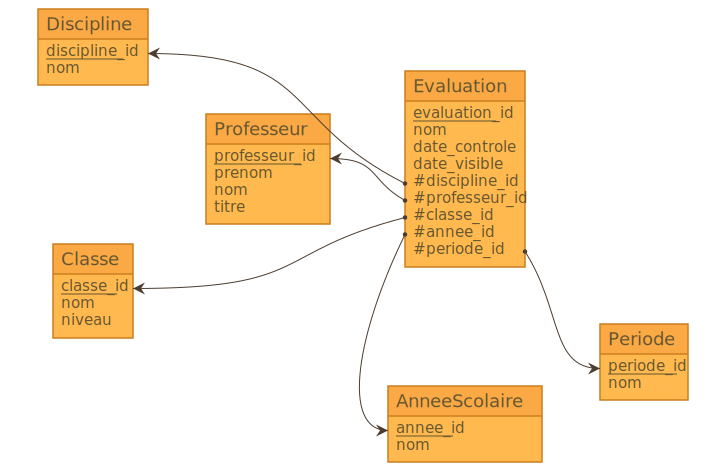

In [7]:
%mocodo --input mocodo_notebook/sandbox.mld --colors desert

Dans le MLD établi par Mocodo, la **relation** EVALUATION comporte bien les attributs que nous avions trouvé logique que l'**entité** EVALUATION possédât.

Complétons le MCD en ajoutant l'entité ELEVE et les associations manquantes.  

### Association  EVALUER qui ?

Une EVALUATION va permettre d'EVALUER des ELEVES et donc de leur attribuer une note.  
Cardinalités:  
 - Une évaluation va permettre d'évaluer **un ou plusieurs** élèves.  
 - Un élève va être évaluer grâce à **une ou plusieurs** évaluations.  

### Association APPARTENIR
Cardinalité:  
 - Un élève appartient à **une et une seule** classe.  
 - Une classe comporte **un ou plusieurs** élèves.  
 
### Association EXISTER
Cardinalité:  
- Durant une année scolaire existent **une ou plusieurs** classes.  
- Une classe existe pendant **une et une seule** année scolaire.  

### Association ENSEIGNER
Cardinalité:  
- Un professeur enseigne **0 ou plusieurs** disciplines à **0 ou plusieurs** classes.  
- Une discipline est enseignée à **0 ou plusieurs** classes par **0 ou plusieurs** professeurs (cela couvre le cas où une discipline cesserait d'être enseignée suite à une réforme où à la désaffection des élèves).  
- Une classe bénéficie de l'enseignement de **1 ou plusieurs** professeurs enseignant **une ou plusieurs** disciplines.  


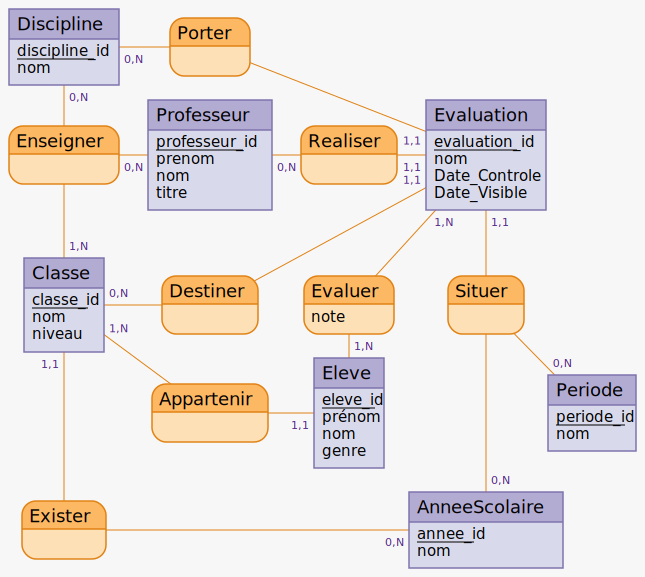

In [8]:
%%mocodo --mld --colors brewer+4 --shapes copperplate --relations diagram markdown_data_dict--strengthen_card (1,1) 

Discipline: discipline_id, nom
Porter, 11 Evaluation, 0N Discipline
::

Enseigner,  0N Professeur, 0N Discipline, 1N Classe
Professeur: professeur_id, prenom, nom, titre
Realiser, 11 Evaluation,  0N Professeur
Evaluation: evaluation_id, nom, Date_Controle, Date_Visible

:
    
Classe: classe_id, nom, niveau
Destiner, 11 Evaluation, 0N Classe
Evaluer, 1N Evaluation, 1N Eleve: note
Situer, 0N AnneeScolaire, 0N Periode, 11 Evaluation

:
Appartenir, 1N Classe, 11 Eleve
Eleve: eleve_id, prénom, nom, genre
:
Periode: periode_id, nom

Exister, 0N AnneeScolaire, 11 Classe
::
AnneeScolaire: annee_id, nom
:

# Le modèle logique de données (MLD) obtenu

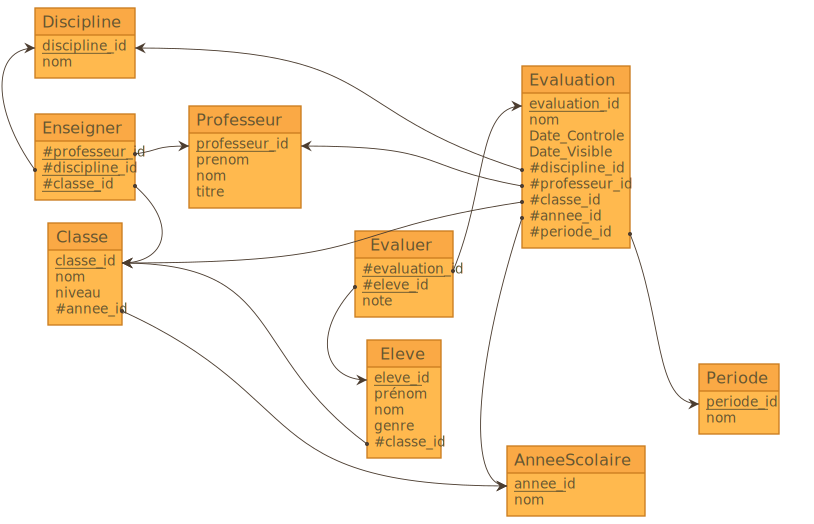

In [9]:
%mocodo --input mocodo_notebook/sandbox.mld --colors desert --scale 0.9

# Le code SQL

Mocodo peut générer le code SQL et l'on peut préciser les types de données entre crochets après chaque attribut dans le MCD:

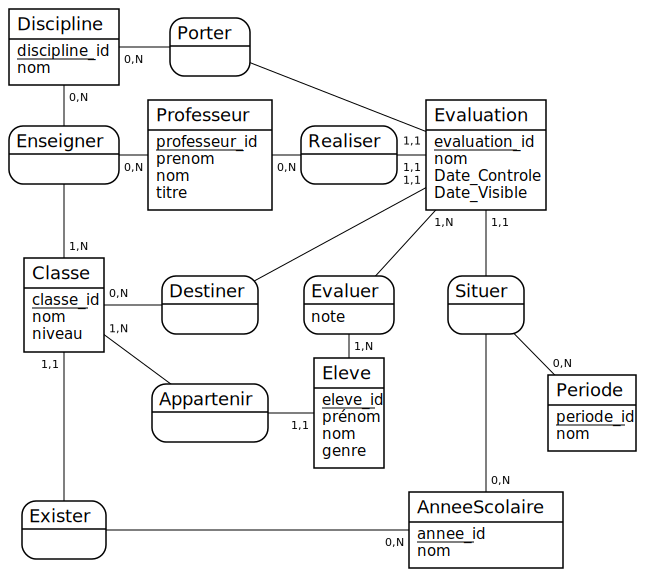

In [10]:
%%mocodo --title=mocodo_gestion_notes --relations=mysql --mld

Discipline: discipline_id, nom
Porter, 11 Evaluation, 0N Discipline
::

Enseigner,  0N Professeur, 0N Discipline, 1N Classe
Professeur: professeur_id, prenom, nom, titre
Realiser, 11 Evaluation,  0N Professeur
Evaluation: evaluation_id, nom, Date_Controle, Date_Visible

:
    
Classe: classe_id, nom, niveau
Destiner, 11 Evaluation, 0N Classe
Evaluer, 1N Evaluation, 1N Eleve: note
Situer, 0N AnneeScolaire, 0N Periode, 11 Evaluation

:
Appartenir, 1N Classe, 11 Eleve
Eleve: eleve_id, prénom, nom, genre
:
Periode: periode_id, nom

Exister, 0N AnneeScolaire, 11 Classe
::
AnneeScolaire: annee_id, nom
:

Si des types ont été oubliés, mocodo remplace les types manquants par VARCHAR(42).

In [ ]:
# %load mocodo_notebook/sandbox_mysql.sql
CREATE DATABASE IF NOT EXISTS `MOCODO_GESTION_NOTES` DEFAULT CHARACTER SET utf8 COLLATE utf8_general_ci;
USE `MOCODO_GESTION_NOTES`;

CREATE TABLE `DISCIPLINE` (
  `discipline_id` VARCHAR(42),
  `nom` VARCHAR(42),
  PRIMARY KEY (`discipline_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `ENSEIGNER` (
  `professeur_id` VARCHAR(42),
  `discipline_id` VARCHAR(42),
  `classe_id` VARCHAR(42),
  PRIMARY KEY (`professeur_id`, `discipline_id`, `classe_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `PROFESSEUR` (
  `professeur_id` VARCHAR(42),
  `prenom` VARCHAR(42),
  `nom` VARCHAR(42),
  `titre` VARCHAR(42),
  PRIMARY KEY (`professeur_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `EVALUATION` (
  `evaluation_id` VARCHAR(42),
  `nom` VARCHAR(42),
  `date_controle` VARCHAR(42),
  `date_visible` VARCHAR(42),
  `discipline_id` VARCHAR(42),
  `professeur_id` VARCHAR(42),
  `classe_id` VARCHAR(42),
  `annee_id` VARCHAR(42),
  `periode_id` VARCHAR(42),
  PRIMARY KEY (`evaluation_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `CLASSE` (
  `classe_id` VARCHAR(42),
  `nom` VARCHAR(42),
  `niveau` VARCHAR(42),
  `annee_id` VARCHAR(42),
  PRIMARY KEY (`classe_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `EVALUER` (
  `evaluation_id` VARCHAR(42),
  `eleve_id` VARCHAR(42),
  `note` VARCHAR(42),
  PRIMARY KEY (`evaluation_id`, `eleve_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `ELEVE` (
  `eleve_id` VARCHAR(42),
  `prénom` VARCHAR(42),
  `nom` VARCHAR(42),
  `genre` VARCHAR(42),
  `classe_id` VARCHAR(42),
  PRIMARY KEY (`eleve_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `PERIODE` (
  `periode_id` VARCHAR(42),
  `nom` VARCHAR(42),
  PRIMARY KEY (`periode_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `ANNEESCOLAIRE` (
  `annee_id` VARCHAR(42),
  `nom` VARCHAR(42),
  PRIMARY KEY (`annee_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

ALTER TABLE `ENSEIGNER` ADD FOREIGN KEY (`classe_id`) REFERENCES `CLASSE` (`classe_id`);
ALTER TABLE `ENSEIGNER` ADD FOREIGN KEY (`discipline_id`) REFERENCES `DISCIPLINE` (`discipline_id`);
ALTER TABLE `ENSEIGNER` ADD FOREIGN KEY (`professeur_id`) REFERENCES `PROFESSEUR` (`professeur_id`);
ALTER TABLE `EVALUATION` ADD FOREIGN KEY (`periode_id`) REFERENCES `PERIODE` (`periode_id`);
ALTER TABLE `EVALUATION` ADD FOREIGN KEY (`annee_id`) REFERENCES `ANNEESCOLAIRE` (`annee_id`);
ALTER TABLE `EVALUATION` ADD FOREIGN KEY (`classe_id`) REFERENCES `CLASSE` (`classe_id`);
ALTER TABLE `EVALUATION` ADD FOREIGN KEY (`professeur_id`) REFERENCES `PROFESSEUR` (`professeur_id`);
ALTER TABLE `EVALUATION` ADD FOREIGN KEY (`discipline_id`) REFERENCES `DISCIPLINE` (`discipline_id`);
ALTER TABLE `CLASSE` ADD FOREIGN KEY (`annee_id`) REFERENCES `ANNEESCOLAIRE` (`annee_id`);
ALTER TABLE `EVALUER` ADD FOREIGN KEY (`eleve_id`) REFERENCES `ELEVE` (`eleve_id`);
ALTER TABLE `EVALUER` ADD FOREIGN KEY (`evaluation_id`) REFERENCES `EVALUATION` (`evaluation_id`);
ALTER TABLE `ELEVE` ADD FOREIGN KEY (`classe_id`) REFERENCES `CLASSE` (`classe_id`);

On remarque ici que la relation Evaluation comporte  #classe_id et #annee_id.  
Cela ne semble pas logique puisque connaître #classe_id donne accès à #annee_id.  
Il ne me paraît donc pas utile de mettre #annee_id comme attribut de la table Evaluation (sql).

Je propose de modifier le code SQL à la main pour préciser les types et de rajouter la fonction `REPLACE` dans les requêtes de création de tables ou de bases de données pour faciliter la phase de développement.

# Rôles

Aux 8 relations auquelles le MLD a aboutit vont correspondre 8 tables SQL.  

La mise à jour de six de ces table nécessite un rôle de gestionnaire de base de données:  
 - Discipline ( discipline_id, nom )  
 - Enseigner ( #professeur_id, #classe_id, #discipline_id )  
 - Professeur ( professeur_id, prenom, nom, titre )  
 - Classe ( classe_id, nom, niveau, #annee_id )  
 - Eleve ( eleve_id, prénom, nom, genre, #classe_id )  
 - Periode ( periode_id, nom )  
 - AnneeScolaire ( annee_id, nom )  

Tandis que la mise à jour des deux dernières nécessitent un rôle d'enseignant:  
 - Evaluation ( evaluation_id, Date_Contrôle, Date_Note_Visible, #discipline_id, #professeur_id, #classe_id, #annee_id, #periode_id )  
 - Evaluer ( #evaluation_id, #eleve_id, note )   
 
 Cependant, avec un rôle d'enseignant la consultation des tables précédente reste possible.
 
 
 Aux rôles précédents se rajoute aussi le rôle d'élève donnant le droit à ceux qui le possède de se connecter à la base de donnés pour consultation des notes et des moyennes personnelles.


## Rôle de gestionnaire

Posséder le rôle de gestionnaire donne le droit de se connecter avec le client `gestionnaire.py`.

J'ai créé 2 tables supplémentaires pour agrémenter écran d'accueil à la connexion:

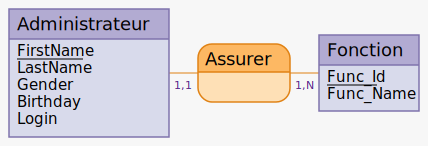

In [13]:
%%mocodo --mld --colors brewer+4 --shapes copperplate --relations diagram markdown_data_dict--strengthen_card (1,1)

Administrateur: FirstName, LastName, Gender, Birthday, Login
Assurer, 11 Administrateur, 1N Fonction
Fonction: Func_Id, Func_Name

Dans le scipt `init_gestiondesnotes.sql` j'ai défini 3 utilisateurs possédant le rôle  de gestionnaire:

In [ ]:
# code sql
CREATE OR replace USER  stil@localhost IDENTIFIED BY 's';                 
GRANT role_gestionnaire TO stil@localhost;
SET DEFAULT ROLE role_gestionnaire FOR stil@localhost;

CREATE OR replace USER  proviseur@localhost IDENTIFIED BY 'p';                 
GRANT role_gestionnaire TO proviseur@localhost;
SET DEFAULT ROLE role_gestionnaire FOR proviseur@localhost;

CREATE OR replace USER  noel_gest@localhost IDENTIFIED BY 'noel';                 
GRANT role_gestionnaire TO noel_gest@localhost;
SET DEFAULT ROLE role_gestionnaire FOR noel_gest@localhost;

Pour être autorisé à se connecter au client `gestionaire.py`, il faut également que l'utilisateur figure dans la table `Administrateur`. Une fois qu’il est connecté, l'interface laisse la possibilité de changer le mot de passe.

## Rôle professeur

Posséder le rôle de professeur donne le droit de se connecter avec le client `client_professeur.py`.

Les onglets sont les mêmes mais les fonctionnalités offertes sont différentes et les droits d'interaction avec les tables sont différents.

Dans le scipt `init_gestiondesnotes.sql` la procédure `remplir_professeur()` permet de créer automatiquement 50 utilisateurs possédant le rôle  de professeur.